In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df0=pd.read_csv("/content/drive/MyDrive/Research Project 1/DATA/megaData.csv")
df0

,Employment,Gender,YearsCode,YearsCodePro,Country,PreviousSalary,ComputerSkills,Employed,Age_<35,Age_>35,...,TypeScript,Unity3D,UnrealEngine,VBA,VMware,Vue.js,Xamarin,Yarn,jQuery,npm
0,1,0,7,4,146,51552,4,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,12,5,141,46482,12,1,1,0,...,1,0,0,0,0,1,0,0,0,0
2,1,0,15,6,54,77290,7,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,9,6,27,46135,13,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,40,30,135,160932,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73394,1,0,7,2,54,41058,13,1,1,0,...,1,0,0,0,0,0,0,0,0,1
73395,1,0,21,16,164,115000,11,1,0,1,...,0,0,0,0,0,0,0,0,0,1
73396,1,0,4,3,110,57720,12,1,1,0,...,1,0,0,0,0,0,0,0,0,0
73397,1,0,5,1,164,70000,15,1,1,0,...,1,0,0,0,0,0,0,1,1,1


In [4]:
class_counts = df0['Employed'].value_counts()
class_counts

Employed
1    39392
0    34007
Name: count, dtype: int64

In [5]:
X=df0.drop("Employed", axis=1)
X

,Employment,Gender,YearsCode,YearsCodePro,Country,PreviousSalary,ComputerSkills,Age_<35,Age_>35,Accessibility_No,...,TypeScript,Unity3D,UnrealEngine,VBA,VMware,Vue.js,Xamarin,Yarn,jQuery,npm
0,1,0,7,4,146,51552,4,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,12,5,141,46482,12,1,0,1,...,1,0,0,0,0,1,0,0,0,0
2,1,0,15,6,54,77290,7,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,9,6,27,46135,13,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,40,30,135,160932,2,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73394,1,0,7,2,54,41058,13,1,0,1,...,1,0,0,0,0,0,0,0,0,1
73395,1,0,21,16,164,115000,11,0,1,1,...,0,0,0,0,0,0,0,0,0,1
73396,1,0,4,3,110,57720,12,1,0,1,...,1,0,0,0,0,0,0,0,0,0
73397,1,0,5,1,164,70000,15,1,0,0,...,1,0,0,0,0,0,0,1,1,1


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_data

array([[ 0.36377693, -0.25755373, -0.7678498 , ..., -0.51323371,
        -0.587047  , -0.55040761],
       [ 0.36377693, -0.25755373, -0.23617734, ..., -0.51323371,
        -0.587047  , -0.55040761],
       [ 0.36377693, -0.25755373,  0.08282614, ..., -0.51323371,
        -0.587047  , -0.55040761],
       ...,
       [ 0.36377693, -0.25755373, -1.08685328, ..., -0.51323371,
        -0.587047  , -0.55040761],
       [ 0.36377693, -0.25755373, -0.98051879, ...,  1.94843008,
         1.70344113,  1.81683534],
       [ 0.36377693,  1.9967017 , -0.44884632, ..., -0.51323371,
        -0.587047  , -0.55040761]])

In [7]:
y = df0['Employed']
y

0        0
1        1
2        0
3        0
4        0
        ..
73394    1
73395    1
73396    1
73397    1
73398    0
Name: Employed, Length: 73399, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size = 0.25, random_state = 42)

In [9]:
X.shape

(73399, 133)

In [10]:
pca = PCA()

In [11]:
pca.fit(df0)

PCA()

In [12]:
explained_variance_ratio = pca.explained_variance_ratio_

In [13]:
explained_variance_ratio

array([9.99998843e-01, 1.08013417e-06, 4.94121844e-08, 2.06129771e-08,
       2.97845059e-09, 2.53533566e-10, 1.87246985e-10, 1.56728904e-10,
       1.47981235e-10, 1.45159883e-10, 1.28691599e-10, 1.20782895e-10,
       1.07114744e-10, 9.95099991e-11, 9.29160519e-11, 9.17797489e-11,
       8.36221656e-11, 7.84257396e-11, 7.76112740e-11, 7.13994994e-11,
       6.96572197e-11, 6.54759253e-11, 6.38507464e-11, 6.11347878e-11,
       6.02181045e-11, 5.88327328e-11, 5.63147751e-11, 5.50699129e-11,
       5.19351929e-11, 5.05012478e-11, 4.82573992e-11, 4.66686157e-11,
       4.44937279e-11, 4.31085441e-11, 4.17929072e-11, 3.97966604e-11,
       3.93977538e-11, 3.78415841e-11, 3.67673317e-11, 3.53197293e-11,
       3.39996239e-11, 3.36816656e-11, 3.10479548e-11, 3.06328782e-11,
       2.98212400e-11, 2.86416547e-11, 2.80578894e-11, 2.75258992e-11,
       2.65228284e-11, 2.62773017e-11, 2.52613908e-11, 2.41980695e-11,
       2.33565312e-11, 2.29855177e-11, 2.24985166e-11, 2.22207442e-11,
      

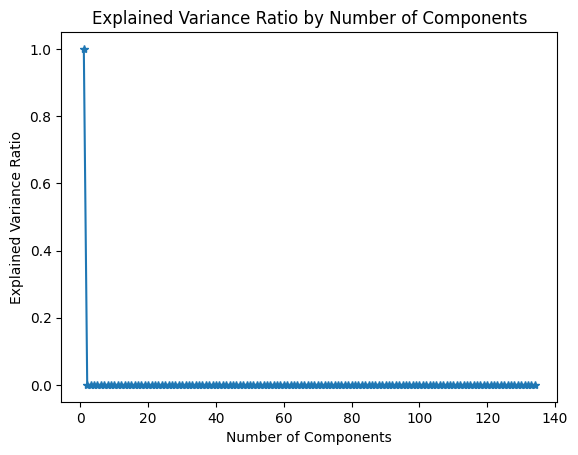

In [14]:
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='*', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.show()

In [15]:
num_components = 1
pca1 = PCA(n_components=num_components)
pca1.fit(scaled_data)

PCA(n_components=1)

In [16]:
reduced_data1 = pca1.transform(X)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [17]:
reduced_data1.shape

(73399, 1)

In [18]:
reduced_df1 = pd.DataFrame(reduced_data1, columns=[f'PC{i}' for i in range(1, num_components+1)])


In [19]:
reduced_df1

,PC1
0,-815.139928
1,-730.925442
2,-1220.271147
3,-723.740082
4,-2548.413227
...,...
73394,-643.588771
73395,-1816.118584
73396,-906.956417
73397,-1101.279119


In [20]:
y

0        0
1        1
2        0
3        0
4        0
        ..
73394    1
73395    1
73396    1
73397    1
73398    0
Name: Employed, Length: 73399, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(reduced_df1, y, test_size = 0.25, random_state = 42)

In [22]:
X_train

,PC1
16300,-156.493711
50785,-1186.231944
43425,-707.179911
11316,-238.106310
10441,-224.460953
...,...
37194,-2374.946834
6265,-640.726687
54886,-77.717068
860,-986.771882


In [23]:
X_test

,PC1
30689,-494.342742
32342,-767.056588
64623,-1739.130758
58352,-1452.556186
7613,-1530.621164
...,...
62391,-1415.818036
57082,-1305.838131
36704,-850.898458
60555,-1197.509833


In [24]:
y_train

16300    0
50785    1
43425    0
11316    0
10441    0
        ..
37194    0
6265     0
54886    0
860      1
15795    1
Name: Employed, Length: 55049, dtype: int64

In [25]:
y_test

30689    1
32342    1
64623    0
58352    0
7613     1
        ..
62391    1
57082    1
36704    0
60555    1
57106    1
Name: Employed, Length: 18350, dtype: int64

# Now using PCA Train and Test data for different models

### LOGISTIC REGRESSION

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
classifier_log = LogisticRegression()

In [28]:
classifier_log.fit(X_train, y_train)

LogisticRegression()

In [29]:
y_pred_log = classifier_log.predict(X_test)

In [30]:
class_report_log = classification_report(y_test, y_pred_log)
print(class_report_log)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8500
           1       0.54      1.00      0.70      9850

    accuracy                           0.54     18350
   macro avg       0.27      0.50      0.35     18350
weighted avg       0.29      0.54      0.37     18350



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
classifier_dt = DecisionTreeClassifier()

In [ ]:
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = classifier_dt.predict(X_test)

In [ ]:
class_report_dt = classification_report(y_test, y_pred_dt)
print(class_report_dt)

              precision    recall  f1-score   support

           0       0.67      0.68      0.68      8500
           1       0.72      0.71      0.72      9850

    accuracy                           0.70     18350
   macro avg       0.70      0.70      0.70     18350
weighted avg       0.70      0.70      0.70     18350



### SUPPORT VECTOR MACHINE (SVM)

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report

In [ ]:
clf_svm = svm.SVC(kernel = "linear", C=1)

In [ ]:
clf_svm.fit(X_train, y_train)

In [ ]:
y_pred_svm = clf_svm.predict(X_test)

#### kernel = "linear"

In [ ]:
class_report_svm_li = classification_report(y_test, y_pred_svm)
print(class_report_svm_li)

####  kernel = "poly"

In [ ]:
clf_svmp = svm.SVC(kernel = "poly", C=1)
clf_svmp.fit(X_train, y_train)

SVC(C=1, kernel='poly')

In [ ]:
y_pred_svmp = clf_svmp.predict(X_test)

In [ ]:
class_report_svm_poly = classification_report(y_test, y_pred_svmp)
print(class_report_svm_poly)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8500
           1       0.54      1.00      0.70      9850

    accuracy                           0.54     18350
   macro avg       0.27      0.50      0.35     18350
weighted avg       0.29      0.54      0.37     18350



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### kernel = "sigmoid"

In [ ]:
clf_svms = svm.SVC(kernel = "sigmoid", C=1)
clf_svms.fit(X_train, y_train)

SVC(C=1, kernel='sigmoid')

In [ ]:
y_pred_svms = clf_svms.predict(X_test)

In [ ]:
class_report_svm_sigmoid = classification_report(y_test, y_pred_svms)
print(class_report_svm_sigmoid)

              precision    recall  f1-score   support

           0       0.47      0.46      0.46      8500
           1       0.54      0.54      0.54      9850

    accuracy                           0.50     18350
   macro avg       0.50      0.50      0.50     18350
weighted avg       0.50      0.50      0.50     18350



#### kernel = "rbf"

In [ ]:
clf_svmr = svm.SVC(kernel = "sigmoid", C=1)
clf_svmr.fit(X_train, y_train)

SVC(C=1, kernel='sigmoid')

In [ ]:
y_pred_svmr = clf_svmr.predict(X_test)

In [ ]:
class_report_svm_sigmoid = classification_report(y_test, y_pred_svmr)
print(class_report_svm_sigmoid)

              precision    recall  f1-score   support

           0       0.47      0.46      0.46      8500
           1       0.54      0.54      0.54      9850

    accuracy                           0.50     18350
   macro avg       0.50      0.50      0.50     18350
weighted avg       0.50      0.50      0.50     18350



### NAIVE BAYES

In [ ]:
from sklearn import naive_bayes
from sklearn.metrics import classification_report

In [ ]:
nb_g = naive_bayes.GaussianNB()

In [ ]:
nb_g.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_nbg = nb_g.predict(X_test)

In [ ]:
class_report_nbg = classification_report(y_test, y_pred_nbg)
print(class_report_nbg)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8500
           1       0.54      1.00      0.70      9850

    accuracy                           0.54     18350
   macro avg       0.27      0.50      0.35     18350
weighted avg       0.29      0.54      0.37     18350



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## ENSEMBLE LEARNING

### RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
clf_rf = RandomForestClassifier(n_estimators = 100, max_depth = 6)

In [ ]:
clf_rf.fit (X_train, y_train)

RandomForestClassifier(max_depth=6)

In [ ]:
y_pred_rf = clf_rf.predict(X_test)

In [ ]:
class_report_rf = classification_report(y_test, y_pred_rf)
print(class_report_rf)

              precision    recall  f1-score   support

           0       0.77      0.03      0.05      8500
           1       0.54      0.99      0.70      9850

    accuracy                           0.55     18350
   macro avg       0.66      0.51      0.38     18350
weighted avg       0.65      0.55      0.40     18350



### ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [ ]:
abc = AdaBoostClassifier(n_estimators = 50, learning_rate = 1)

In [ ]:
clf_ab=abc.fit(X_train, y_train)

In [ ]:
y_pred_ab = clf_ab.predict(X_test)

In [ ]:
class_report_ab = classification_report(y_test, y_pred_ab)
print(class_report_ab)

              precision    recall  f1-score   support

           0       0.70      0.03      0.07      8500
           1       0.54      0.99      0.70      9850

    accuracy                           0.55     18350
   macro avg       0.62      0.51      0.38     18350
weighted avg       0.62      0.55      0.41     18350



### GRADIENT BOOSTING CLASSIFIER (GBT)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [ ]:
clf_gbt = GradientBoostingClassifier(
    loss = 'log_loss',
    learning_rate = 0.1,
    n_estimators = 100,
    max_depth = 5,
    subsample = 1.0,
    random_state = 42
)

In [ ]:
clf_gbt.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred_gbt = clf_gbt.predict(X_test)

In [ ]:
class_report_gbt = classification_report(y_test, y_pred_gbt)
print(class_report_gbt)

              precision    recall  f1-score   support

           0       0.73      0.22      0.34      8500
           1       0.58      0.93      0.71      9850

    accuracy                           0.60     18350
   macro avg       0.66      0.57      0.53     18350
weighted avg       0.65      0.60      0.54     18350

